### Introduction
The following work provides exploration of row 286 to row 618 in file 2015_16_PP1_285.csv

Please refer to CollegeScorecardDataDictionary.xlsx for detailed information about the above file.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
with open('2015_16_PP1_285.csv', encoding="latin-1") as datafile:
    df = pd.read_csv(datafile, header = 0)

C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (7,10,1724,1725,1726,1727,1728,1742) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Columns: 1804 entries, Unnamed: 0 to OMENRUP8_PTNFT
dtypes: float64(1598), int64(14), object(192)
memory usage: 104.5+ MB


#### 20. 25 or 75 percentile of the ACT cumulative (CM), English (EN), math (MT), writing (WR) score.

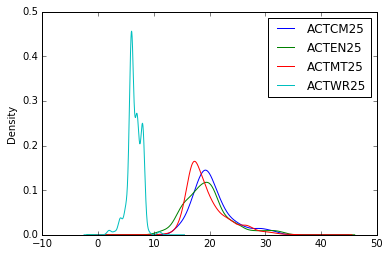

In [18]:
temp = df[['ACTCM25', 'ACTEN25', 'ACTMT25', 'ACTWR25']]
temp.plot.kde()

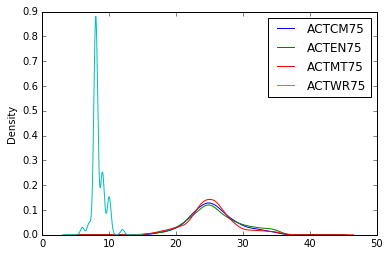

In [19]:
temp = df[['ACTCM75', 'ACTEN75', 'ACTMT75', 'ACTWR75']]
temp.plot.kde()

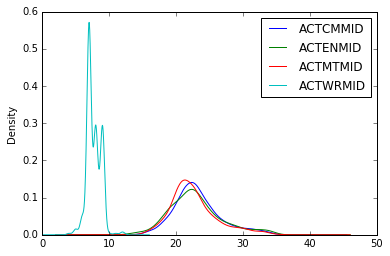

In [22]:
temp = df[['ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID']]
temp.plot.kde()

The distribution of writting score has many peaks while the rest curves are relatively smooth. Why?

#### 21.SAT_AVG_ALL Average SAT scores equivalent score of all students admited.

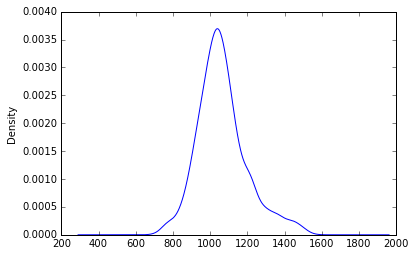

In [24]:
df.SAT_AVG_ALL.plot.kde()

In [25]:
df.SAT_AVG_ALL.describe()

count    1398.000000
mean     1064.991416
std       134.521182
min       708.000000
25%       980.250000
50%      1048.000000
75%      1127.000000
max      1544.000000
Name: SAT_AVG_ALL, dtype: float64

Average SAT score is 1064, with min 708 and max 1544. Full score is 1600.

#### 21. PCIP0-CIP54 Percentage of degrees awarded
Let's take a look at the STEM field.

computer PCIP11
engineering PCIP14
engineering_technology PCIP15
biological PCIP26
mathematics PCIP27
physical_science PCIP40
science_technology PCIP41



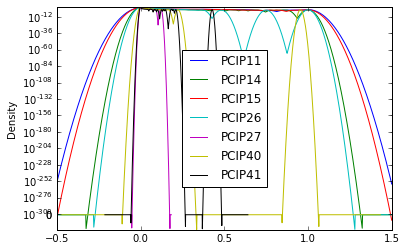

In [27]:
temp = df[['PCIP11', 'PCIP14', 'PCIP15', 'PCIP26', 'PCIP27', 'PCIP40', 'PCIP41']]
temp.plot.kde(logy = True)

In [29]:
temp.describe()

,PCIP11,PCIP14,PCIP15,PCIP26,PCIP27,PCIP40,PCIP41
count,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000
mean,0.029879,0.008645,0.021702,0.015174,0.002867,0.004161,0.000652
std,0.085413,0.049439,0.077784,0.042589,0.008054,0.016909,0.008893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.025700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.122300,0.954300,0.427100


computer and engineer_technology have the highest percentage of degree award (29.9% and 21.7%, respectively).
science_technology has the lowest percentage of degree awarded (0.065%)

#### 22.Let's look at the Science and Engineering Bachelor's degrees.
CIP11BACHL computer
CIP14BACHL Enigneering
CIP15BACHL Engineering Technology
CIP26BACHL biological
CIP27BACHL mathematics
CIP40BACHL physical_science
CIP41BACHL science_technology

0, programs not offered
1, programs offered
2, program offered through an exclusively distance-education program

In [42]:
temp = df[['CIP11BACHL', 'CIP14BACHL', 'CIP15BACHL', 'CIP26BACHL', 'CIP27BACHL', 'CIP40BACHL', 'CIP41BACHL']]

In [43]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 7 columns):
CIP11BACHL    7147 non-null float64
CIP14BACHL    7147 non-null float64
CIP15BACHL    7147 non-null float64
CIP26BACHL    7147 non-null float64
CIP27BACHL    7147 non-null float64
CIP40BACHL    7147 non-null float64
CIP41BACHL    7147 non-null float64
dtypes: float64(7)
memory usage: 415.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012D95F02B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000012D9646F6A0>]], dtype=object)

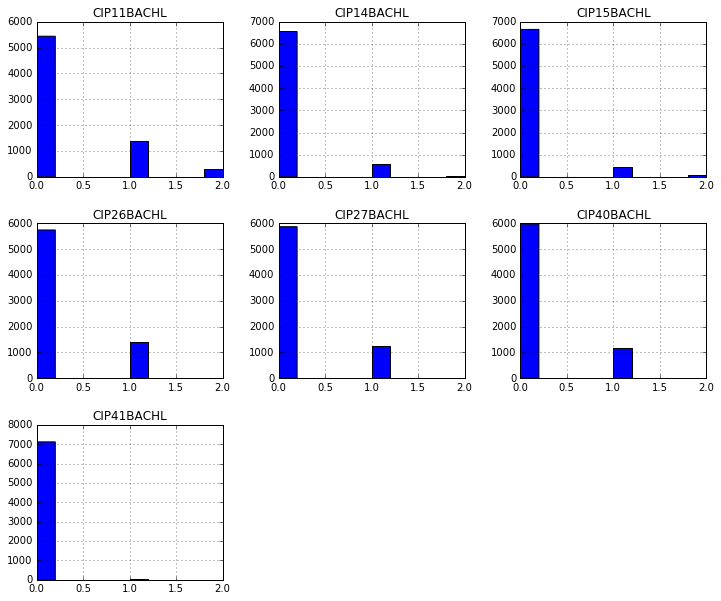

In [47]:
temp.hist(figsize = (12, 10))

7147 counts plus 449 counts with missing or negative values previously found. No other missing values.
Most institutions doesn't contain science and engineering degrees. Need to dig more. Are they from the same institutions, or from different ones? Probably only a small portion of these institutions have all these science and engineering degrees.

#### 23. UGDS enrollment of undergraduate certificate/degree-seeking students

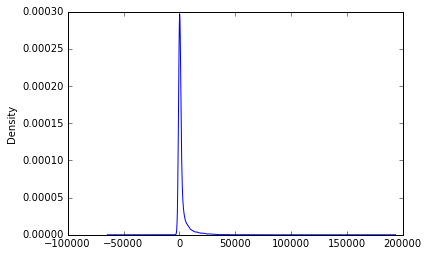

In [51]:
df.UGDS.plot.kde()

#### Right-tailed distribution. Why?

#### 24. student race
UGDS_WHITE white

UGDS_BLACK black

UGDS_HISP  hispanic

UGDS_ASIAN Asian

UGDS_OTHERS all others added together (created new column) using df[['a','b']].sum(axis=1)

This data is not available due to change of definition of races

In [56]:
df = df.drop(['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN','UGDS_NHPI', 'UGDS_2MOR','UGDS_NRA','UGDS_UNKN', 'UGDS_WHITENH','UGDS_BLACKNH','UGDS_API',
                     'UGDS_AIANOLD', 'UGDS_HISPOLD'], axis = 1)

In [59]:
df.NPT4_PROG.isnull().sum()

7593

In [60]:
df.NPT4_OTHER.isnull().sum()

7593

Row 557 to row 592 are mostly empty.

#### 25. Average cost of students
COSTT4_A  Average cost of attendance (academic year institutions)
COSTT4_P Average cost of attendance (program-year institutions)

In [72]:
df.COSTT4_A.describe()

count     3920.000000
mean     25437.879337
std      13439.654437
min       4559.000000
25%      14209.000000
50%      23190.000000
75%      31811.500000
max      91532.000000
Name: COSTT4_A, dtype: float64

In [73]:
df.COSTT4_P.describe()

count     2500.000000
mean     19259.064800
std       6506.105635
min       3201.000000
25%      15033.750000
50%      18672.000000
75%      23163.750000
max      95165.000000
Name: COSTT4_P, dtype: float64

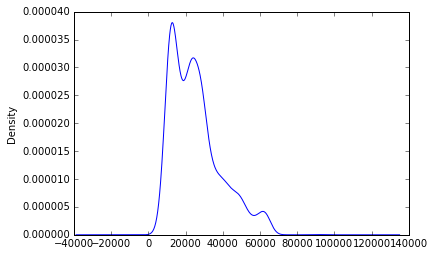

In [70]:
df.COSTT4_A.plot.kde()

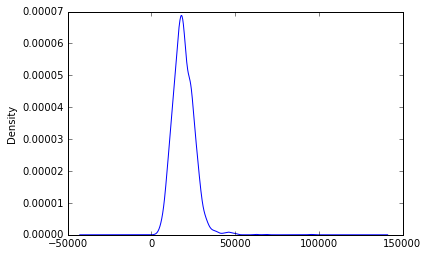

In [74]:
df.COSTT4_P.plot.kde()

Average cost of attendance (academic year institutions) is about 25% higher than average cost of attendance (program-year institutions)
on average and shows a broader distribution too.

In [ ]:
df.to_csv('2015_16_PP286_618.csv') 